<a href="https://colab.research.google.com/github/thaispaes/Aulas-python-senac/blob/main/Avalia%C3%A7%C3%A3o_IV_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de Classificação para Predição de Pedra nos Rins

O desafio escolhido  foi um de classificação e predição para definir se um paciente tem a possibilidade de adquirir pedra nos rins de acordo com algumas informações do paciente.

***Link do desafio:*** https://www.kaggle.com/competitions/playground-series-s3e12/overview

*Integrantes da Equipe*: 
- Augusto Shigeru
- Davi Freitas
- Marcela Lins
- Thais Regina


#Importação das bibliotecas 



In [67]:
#Importando Bibliotecas
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

import sklearn as sk

# Importação dos dados

In [68]:
#Importanto nosso Dataset de Treino
train_table = pd.read_csv("/content/train.csv", sep=",")

In [69]:
train_table

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


#Classificação da base de teste

Analisando nossa base de dados, temos uma coleção de informações medicas sobre a situação de pacientes que estão com cálculo renal. Os dados observados são *Gravidade da situação, Ph Osmose e Condição dos rins, Ureia e Calculo do tamanho da pedra*, informações obtidas apartir da análise de urina. 

Usando essa base, vamos poder criar os modelos para que preveja se uma pessoa tem ou não cálculo renal.

Retirando o ID para que não atrapalhe no treino, já que analisando o Dataset, os campos importantes para nosso treino são as colunas de "*gravity ph osmo cond urea	calc target*" que fornecem informações importantes sobre os pacientes para a predição.

In [70]:
train_table=train_table.drop("id",axis=1)

In [71]:
#Verificação de valores nulos
display(train_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
 6   target   414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.8 KB


None

In [72]:
#Verificando a distribuição da variável resposta (Quantos Tem ou não tem)
quant = train_table['target'].value_counts()
print(quant)

0    230
1    184
Name: target, dtype: int64


In [73]:
#Verificando as colunas para separar o X e o Y
train_table.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


In [74]:
X = train_table[['gravity','ph','osmo','cond','urea','calc']] #Esses são as variáveis que estão relacionadas com a nossa saída
y = train_table[['target']] #Saída/Resposta esperada

#Classificações e Modelos

Usamos **3 classificadores**: 


*   Random Forest
*   Árvore de Decisão 
*   KNN

Para o **treino** separamos 75% dos dados e 25% foi para **teste** do modelo para medirmos a precisão e a acurácia.






In [75]:
#Lista para salvar o resultado dos treinos 
acuracia_modelo1 = []
acuracia_modelo2 = []
acuracia_modelo3 = []

precisao_modelo1 = []
precisao_modelo2 = []
precisao_modelo3 = []

Treinando os Modelos

In [ ]:
#Definindo a execução do nosso teste, setando 75% de treino e 25% de teste
train_size = 0.75
iteracoes = 25

#Treino
for i in range(iteracoes):

    X_treino, X_teste, y_treino, y_teste = sk.model_selection.train_test_split(X, y, train_size = train_size)

    #Modelo 1 = Random Forest 
    model1 = sk.ensemble.RandomForestClassifier()
    model1.fit(X_treino, y_treino)

    #Modelo 2 =  Árvore de Decisão
    model2 = sk.tree.DecisionTreeClassifier()
    model2.fit(X_treino, y_treino)

    #Modelo 3 = KNN 
    model3 = sk.neighbors.KNeighborsClassifier(n_neighbors=6)
    model3.fit(X_treino, y_treino)

    #Avaliação dos Modelos ou Teste
    predict1 = model1.predict(X_teste)
    acuracia_modelo1.append(sk.metrics.accuracy_score(y_teste, predict1))
    precisao_modelo1.append(sk.metrics.precision_score(y_teste, predict1))

    predict2 = model2.predict(X_teste)
    acuracia_modelo2.append(sk.metrics.accuracy_score(y_teste, predict2))
    precisao_modelo2.append(sk.metrics.precision_score(y_teste, predict2))

    predict3 = model3.predict(X_teste)
    acuracia_modelo3.append(sk.metrics.accuracy_score(y_teste, predict3))
    precisao_modelo3.append(sk.metrics.precision_score(y_teste, predict3))


#Avaliação 

Após testar e treinar nossos modelos, vamos agora poder analisar qual se saiu melhor com base nos dados que temos.

In [77]:
#Verificando a Acurácia dos modelos usados

print('Média acurácia modelo 1:')
print(np.round(np.mean(acuracia_modelo1),2))
print('Média acurácia modelo 2:')
print(np.round(np.mean(acuracia_modelo2),2))
print('Média acurácia modelo 3:')
print(np.round(np.mean(acuracia_modelo3),2))

Média acurácia modelo 1:
0.73
Média acurácia modelo 2:
0.65
Média acurácia modelo 3:
0.61


In [78]:
#Verificando a Precisão dos modelos usados

print('Média precisão modelo 1:')
print(np.round(np.mean(precisao_modelo1),2))
print('Média precisão modelo 2:')
print(np.round(np.mean(precisao_modelo2),2))
print('Média precisão modelo 3:')
print(np.round(np.mean(precisao_modelo3),2))

Média precisão modelo 1:
0.71
Média precisão modelo 2:
0.61
Média precisão modelo 3:
0.59


#Predição com o modelo de Melhor Desempenho

Analisando os resultados acima, foi possivel observar qual modelo se saiu melhor no treinamento, e com bas nisso vamos comçar nossa predição.

In [79]:
#Importando nosso teste
base_test = pd.read_csv("/content/test.csv", sep=",") 

#Descobrindo colunas do teste
base_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB


In [ ]:
#Formando resposta da predição e salvando o resultado (Target) numa lista para posterior utilização
target = [] #Lista do target

for i in range(276): #Informamos para que percorra todo o arquivo de teste
    pacientes = [[base_test['gravity'][i],base_test['ph'][i],base_test['osmo'][i],base_test['cond'][i], 
                  base_test['urea'][i],base_test['calc'][i]]] #Criamos uma array 2d para armazenas nossas variáveis X 
    resposta = model1.predict(pacientes) #Realizamos as predições usando o Modelo com melhor desempenho
    target.append(resposta[0]) #E salvamos a resposta na nossa lista

Com as nossas respostas salvas, podemos agora criar o CSV que precisamos submeter no Kaggle

In [81]:
#Gerando DataFrame de submission
tabela_submission = {} 
tabela_submission['id'] = list(range(414,690)) #Inserindo os ID's correspontes 
tabela_submission['target'] = target #Inserindo nossas respostas/saídas

tabela_submission = pd.DataFrame(tabela_submission) #Criando nosso Dataframe

#Salvando o dataframe num arquivo CSV
tabela_submission.to_csv('submission.csv', index=False)

**Resultado informado no Kaggle**


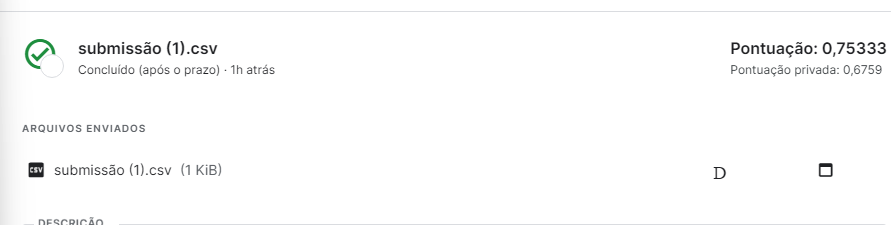


E essa foi a pontuação resultada pelo kaggle

#Predição com o modelo de Menor desempenho

Com as observações acima, vamos tentar agora com um outro modelo treinado.

In [ ]:
#Usamos a mesma logica acima, mas criamos um novo arquivo ao final
target_lower = [] #Lista do target

for i in range(276): #Informamos para que percorra todo o arquivo de teste
    pacientes = [[base_test['gravity'][i],base_test['ph'][i],base_test['osmo'][i],base_test['cond'][i], 
                  base_test['urea'][i],base_test['calc'][i]]] 
    resposta = model3.predict(pacientes) #Realizamos as predições usando o Modelo com menor desempenho
    target_lower.append(resposta[0]) #E salvamos a resposta na nossa lista

In [83]:
#Gerando DataFrame de submission
tabela_submission_2 = {} 
tabela_submission_2['id'] = list(range(414,690)) #Inserindo os ID's correspontes 
tabela_submission_2['target'] = target_lower #Inserindo nossas respostas/saídas

tabela_submission_2 = pd.DataFrame(tabela_submission_2) #Criando nosso Dataframe

#Salvando o dataframe num arquivo CSV
tabela_submission_2.to_csv('submission_other.csv', index=False)

**Resultado do Kaggle - Menor Desempenho**
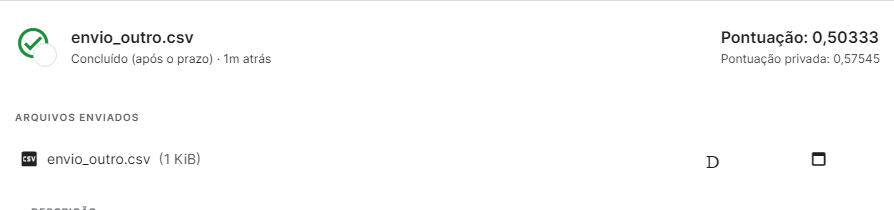

Em comparação com o outro modelo, podemos observar que a diferença foi bastante e podemos levar isso em consideração, já que pode gerar resultados "falsos".

Ou seja, usar o Random Florest foi a melhor opção nesse caso, já o seu desempenho foi bem melhor em comparação com o KNN. 

Talvez isso tenha ocorrido porque o Random florest ele combina o resultado de múltiplos modelos para produzir a melhor predição, e como temos muitos dados, o KNN provavelmente teve um espaço alto e dificultou sua analise.
